wlcstat - Statistics Package for the Wormlike Chain Model
===============================================

In [14]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc

#from wlcstat.wlcave import *
#from wlcstat.wlcgreen import *

Demonstrate functions within the 'wlcave' module

In [15]:
import importlib
importlib.reload(wlcave)
importlib.reload(wlcgreen)
importlib.reload(wlcstruc)

<module 'wlcstat.wlcstruc' from '/Users/ajspakow/Documents/Simulation/spakowitz/github/wlcstat/wlcstat/wlcstruc.py'>

Example usage of the 'r2_ave' function within 'wlcave' module

In [3]:
num_pts = 100
length_kuhn_0 = 1e-3
length_kuhn_f = 1e3
length_kuhn = np.logspace(np.log10(length_kuhn_0), np.log10(length_kuhn_f), num_pts)
dimensions = 3
r2 = wlcave.r2_ave(length_kuhn, dimensions)
r2short = length_kuhn ** 2
r2long = length_kuhn * 2 / (dimensions - 1)

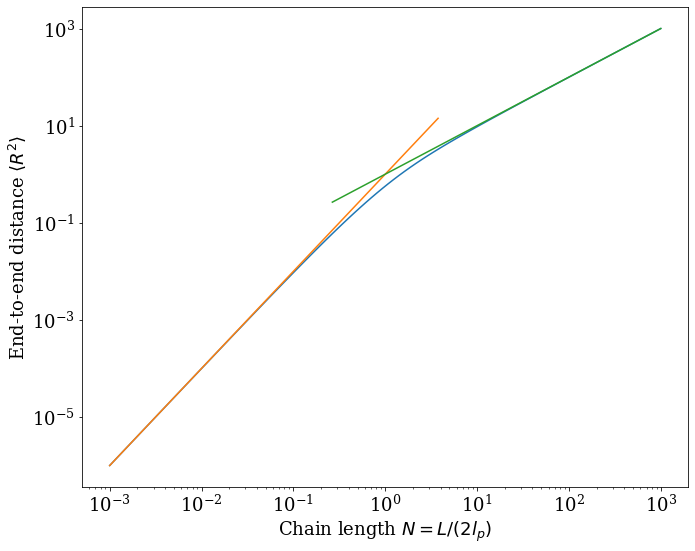

In [4]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.loglog(length_kuhn, r2)
plt.loglog(length_kuhn[0:60], r2short[0:60])        # Short length asymptotic solution
plt.loglog(length_kuhn[40:100], r2long[40:100]) # Long length asymptotic solution
plt.xlabel(r'Chain length $N = L/(2l_{p})$')
plt.ylabel(r'End-to-end distance $\langle R^{2} \rangle$')
plt.tight_layout()
plt.show()

Example usage of the 'rg2_ave' function within 'wlcave' module

In [5]:
num_pts = 100
length_kuhn_0 = 1e-3
length_kuhn_f = 1e3
length_kuhn = np.logspace(np.log10(length_kuhn_0), np.log10(length_kuhn_f), num_pts)
dimensions = 3
rg2 = wlcave.rg2_ave(length_kuhn, dimensions)
rg2short = length_kuhn ** 2 / 12
rg2long = length_kuhn / (3 * (dimensions - 1))

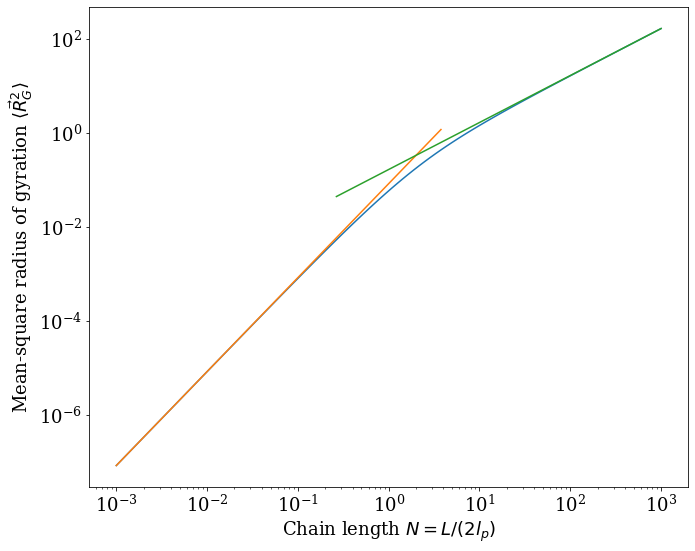

In [6]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.loglog(length_kuhn, rg2)
plt.loglog(length_kuhn[0:60], rg2short[0:60])        # Short length asymptotic solution
plt.loglog(length_kuhn[40:100], rg2long[40:100]) # Long length asymptotic solution
plt.xlabel(r'Chain length $N = L/(2l_{p})$')
plt.ylabel(r'Mean-square radius of gyration $\langle \vec{R}_{G}^{2} \rangle$')
plt.tight_layout()
plt.show()

Example usage of 'rz4_ave' function within 'wlcave' module

In [7]:
num_pts = 100
length_kuhn_0 = 1e-3
length_kuhn_f = 1e3
length_kuhn = np.logspace(np.log10(length_kuhn_0), np.log10(length_kuhn_f), num_pts)
dimensions = 3
rz4 = wlcave.rz4_ave(length_kuhn, dimensions)
rz4short = length_kuhn ** 4 * 3 / (dimensions * (dimensions + 2))
rz4long = length_kuhn ** 2 * 12 / (dimensions * (dimensions - 1)) ** 2

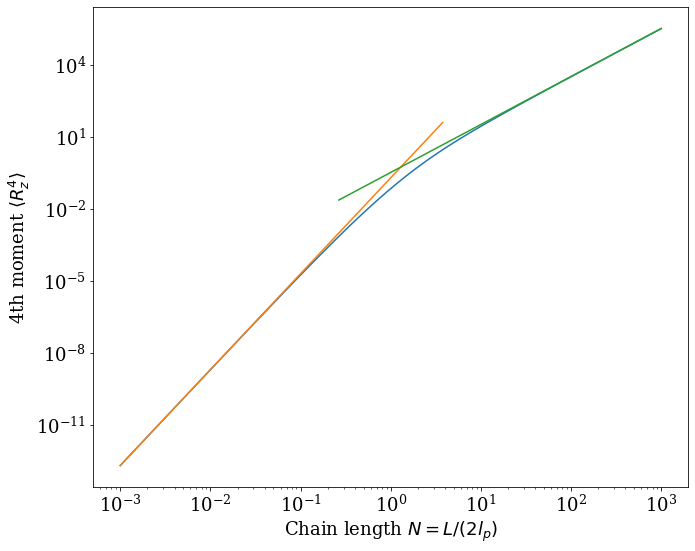

In [8]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.loglog(length_kuhn, rz4)
plt.loglog(length_kuhn[0:60], rz4short[0:60])        # Short length asymptotic solution
plt.loglog(length_kuhn[40:100], rz4long[40:100]) # Long length asymptotic solution
plt.xlabel(r'Chain length $N = L/(2l_{p})$')
plt.ylabel(r'4th moment $\langle R_{z}^{4} \rangle$')
plt.tight_layout()
plt.show()

Example usage of 'eval_poles_and_residues' function within 'wlcgreen' module

In [72]:
num_k = 100
k_val_0 = 1e-1
k_val_f = 1e5
k_val = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
mu=10
dimensions = 5

num_poles = min(20, 26-mu)
poles = np.zeros((num_k, num_poles), dtype=type(1 + 1j))

for i_k_val in range(num_k):
    poles_k_val, resi_k_val = wlcgreen.eval_poles_and_residues(k_val[i_k_val],mu,dimensions)
    for i_pole in range(num_poles):
        poles[i_k_val, i_pole] = poles_k_val[i_pole]

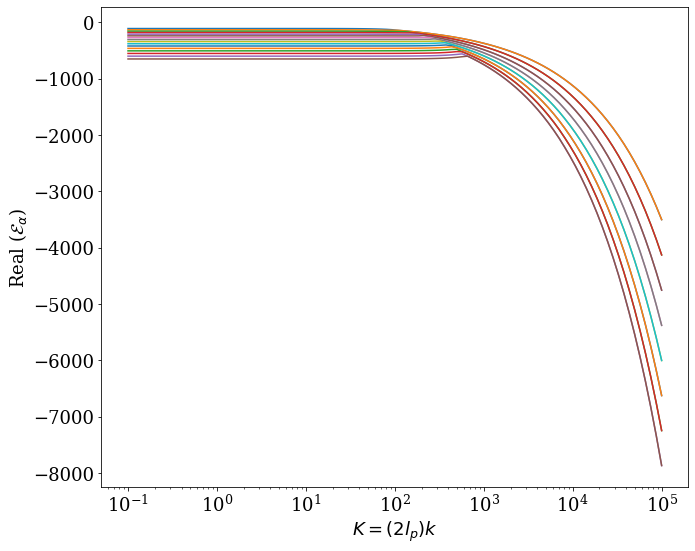

In [73]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.semilogx(k_val, np.real(poles[:, i_pole]))
    
plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'Real ($\mathcal{E}_{\alpha}$)')
plt.tight_layout()
plt.show()

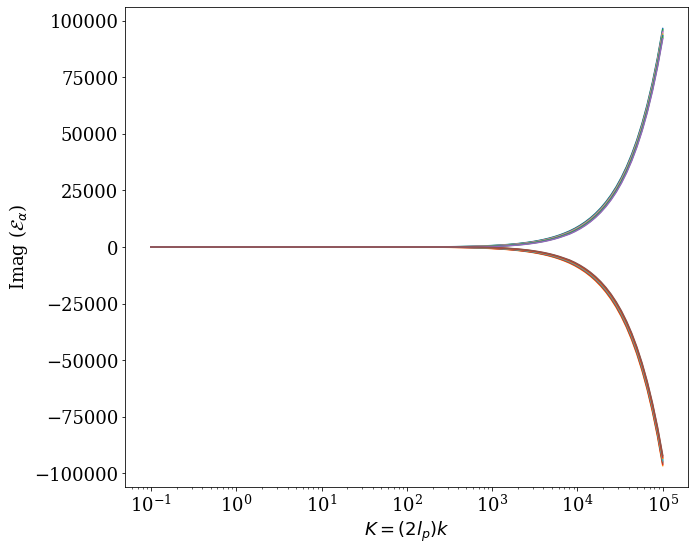

In [74]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.semilogx(k_val, np.imag(poles[:, i_pole]))

plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'Imag ($\mathcal{E}_{\alpha}$)')
plt.tight_layout()
plt.show()

In [70]:
num_k = 100
k_val_0 = 1e-4
k_val_f = 1e6
k_val = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
mu=0
dimensions = 3
num_poles = 25

num_poles = min(num_poles, 26-mu)
poles = np.zeros((num_k, num_poles), dtype=type(1 + 1j))
residues = np.zeros((num_k, num_poles), dtype=type(1 + 1j))

for i_k_val in range(num_k):
    poles_k_val, resi_k_val = wlcgreen.eval_poles_and_residues(k_val[i_k_val],mu,True,False,dimensions)
    for i_pole in range(num_poles):
        poles[i_k_val, i_pole] = poles_k_val[i_pole]
        residues[i_k_val, i_pole] = resi_k_val[0, 0, i_pole]

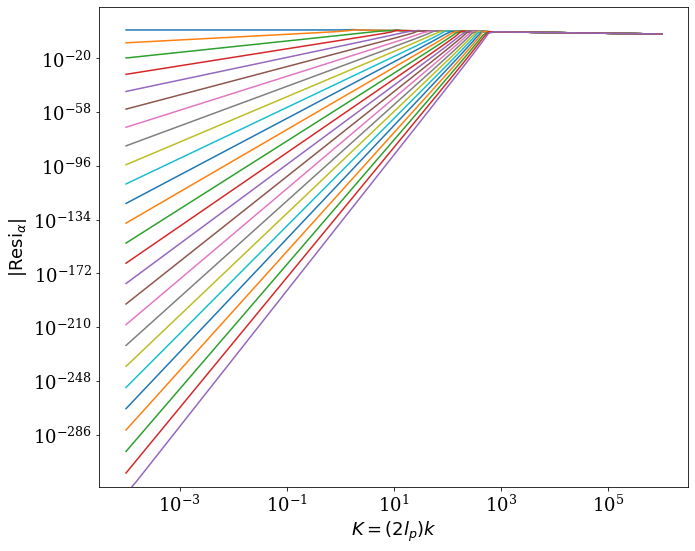

In [71]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.loglog(k_val, np.real(abs(residues[:, i_pole])))

plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'$| \mathrm{Resi}_{\alpha} |$')
plt.tight_layout()
plt.show()

In [10]:
r_val = np.linspace(0,1,500)
#n_val = np.linspace(0.1,1,10)
n_val = 0.5
g_wlc_val = wlcgreen.gwlc_r(r_val, n_val)

KeyboardInterrupt: 

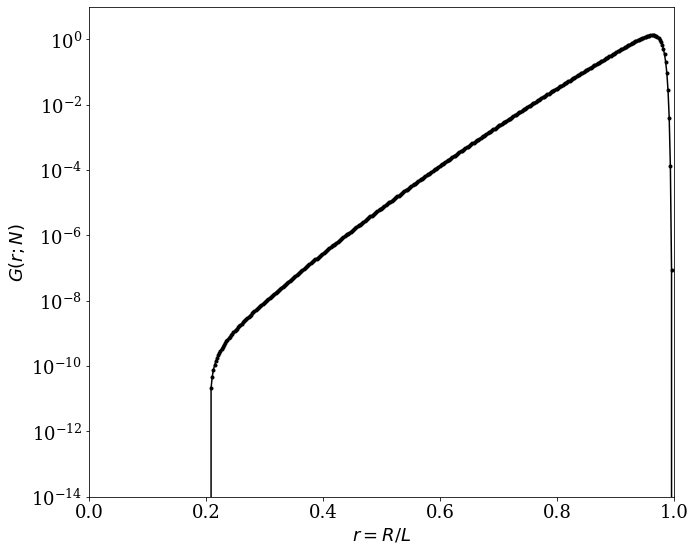

In [13]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.semilogy(r_val, np.real(g_wlc_val[:, 1]),'k.-')

plt.xlabel(r'$r = R/L$')
plt.ylabel(r'$G(r;N)$')
plt.ylim((1e-14, 1e1))
plt.xlim((0, 1))
plt.tight_layout()
plt.show()

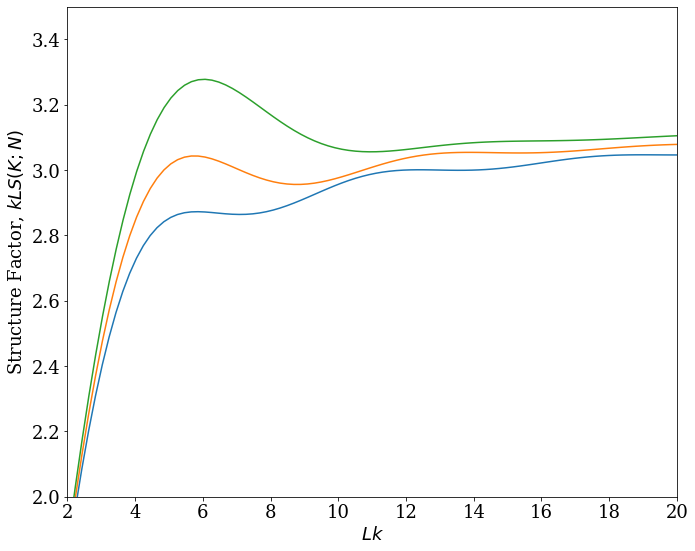

In [22]:
num_k = 100
k_val_0 = 1e-2
k_val_f = 20
length_kuhn_vec = np.array([0.1, 0.5, 1])
dimensions = 3

plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for ind_length in range(0, len(length_kuhn_vec)):
    length_kuhn = float(length_kuhn_vec[ind_length])
    k_val = np.linspace(k_val_0, k_val_f / length_kuhn, num_k)
    structure_factor = wlcstruc.eval_structure_factor(k_val, length_kuhn, dimensions)
    plt.plot(k_val * length_kuhn, np.real(structure_factor * k_val * length_kuhn),'-')
    
plt.xlabel(r'$Lk$')
plt.ylabel(r'Structure Factor, $k L S(K;N)$')
plt.ylim((2, 3.5))
plt.xlim((2, 20))
plt.tight_layout()
plt.show()    
    